In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ema_workbench import (Model, CategoricalParameter,
                           ScalarOutcome, IntegerParameter, RealParameter,Constant)
from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress)
#from dike_model_function import DikeNetwork  # @UnresolvedImport

def sum_over(*args):
    return sum(args)

In [3]:
from ema_workbench import (Model, RealParameter, ScalarOutcome, SequentialEvaluator,
                           MultiprocessingEvaluator, ema_logging,
                           Constant, Policy, Scenario)

ema_logging.log_to_stderr(ema_logging.INFO)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench import ScalarOutcome
from ema_workbench.util import ema_logging
import time
from problem_formulation_V2_0 import get_model_for_actor_problem_formulation

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [5]:
#generate the model --Change the argument for different actor formulations
model, planning_steps = get_model_for_actor_problem_formulation(1, outcome_type='scalar')

In [ ]:
#for unc in dike_model.uncertainties:
 #   print(repr(unc))

In [6]:
#for unc in dike_model.uncertainties:
#    print(repr(unc))
    
uncertainties = model.uncertainties

import copy
uncertainties = copy.deepcopy(model.uncertainties)

In [7]:
#for policy in model.levers: 
#    print(repr(policy))
levers = model.levers 

import copy
levers = copy.deepcopy(model.levers)

In [ ]:
#for outcome in model.outcomes:
#   print(repr(outcome))

In [8]:
#create reference case of policy levers all set to 0
levs = []
for lev in model.levers:
    levs.append(lev)\

do_nothing_policy = Policy("do nothing", **{lever.name:0 for lever in levs})

# Build a user-defined scenario and policy:
reference_values = {'Bmax': 175, 'Brate': 1.5, 'pfail': 0.5,
                        'ID flood wave shape': 4, 'planning steps': 2}
reference_values.update({'discount rate {}'.format(n): 3.5 for n in planning_steps})
scen1 = {}

for key in model.uncertainties:
    name_split = key.name.split('_')

    if len(name_split) == 1:
        scen1.update({key.name: reference_values[key.name]})
    else:
        scen1.update({key.name: reference_values[name_split[1]]})

ref_scenario = Scenario('reference', **scen1)

#no dike increase, no warning, none of the rfr
zero_policy = {'DaysToThreat': 0}
zero_policy.update({'DikeIncrease {}'.format(n): 0 for n in planning_steps})
zero_policy.update({'RfR {}'.format(n): 0 for n in planning_steps})
pol0 = {}

for key in model.levers:
    s1, s2 = key.name.split('_')
    pol0.update({key.name: zero_policy[s2]})

policy0 = Policy('Policy 0', **pol0)
    
#define convergence metrics --COMPUTATIONALLY EXPENSIVE SO COMMENT OUT WHERE NECESSARY
#specifying min and max values...play around with this max!!
convergence_metrics = [HyperVolume(minimum=[0,0,0,0,0,0,0,0], maximum=[2e08,2e08,10,2e08,2e08,10,2e08,2e08]), EpsilonProgress()]

In [ ]:
#with both searchover = 'uncertainties' then = 'levers'...but then change the refernece!!
with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=10000, searchover='levers', logging_freq = 100,
                                              epsilons=[10,8,0.1,10,8,0.1,8,8],convergence = convergence_metrics, reference=ref_scenario)

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/10000 nfe


In [13]:
outcomes = results.iloc[:,31:39]

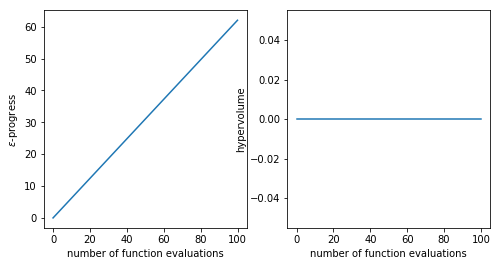

In [10]:
#Plot the convergence statistics
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(convergence.nfe, convergence.hypervolume)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [11]:
#when we achieve convergence, check the results  only for 3 objectives at a time
#3d scatterplot for pareto optimal solutions
from mpl_toolkits.mplot3d import Axes3D  

ax = fig.add_subplot(111, projection='3d')
ax.scatter??
ax.scatter(#numpy array here)
ax.set_xlabel('Expected Annual Damage')
ax.set_ylabel('Total Investment Costs')
ax.set_zlabel('Expected Number of Deaths')
#plt.show()

SyntaxError: invalid syntax (<ipython-input-11-a079433874c3>, line 9)

C:\Users\ivarnieuwepc\Anaconda3\lib\site-packages\matplotlib\tight_layout.py:181: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. '


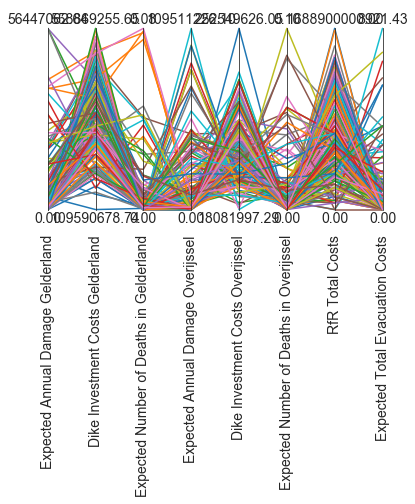

In [14]:
#evaluate trade offs between the three objectives
from ema_workbench.analysis import parcoords
limits = parcoords.get_limits(outcomes)
axes = parcoords.ParallelAxes(limits)
axes.plot(outcomes)

plt.show()
